In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time


PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

from src.evaluate import load_model, evaluate_mask

MODEL_PATH = os.path.join(PROJECT_ROOT, "checkpoints/ecssd_exp/best_model.keras")
model = load_model(MODEL_PATH)

print("Model loaded successfully:", MODEL_PATH)

Model loaded successfully: c:\Users\Admin\Desktop\ML_SOD\checkpoints/ecssd_exp/best_model.keras


In [221]:
from tkinter import Tk, filedialog

# Hide main window
Tk().withdraw()

print("Select an image file to evaluate...")
image_path = filedialog.askopenfilename(
    title="Select image",
    filetypes=[("Image Files", "*.jpg *.jpeg *.png")]
)

if not image_path:
    print("No image selected!")
else:
    print("Selected image:", image_path)

Select an image file to evaluate...
Selected image: C:/Users/Admin/Desktop/test image.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


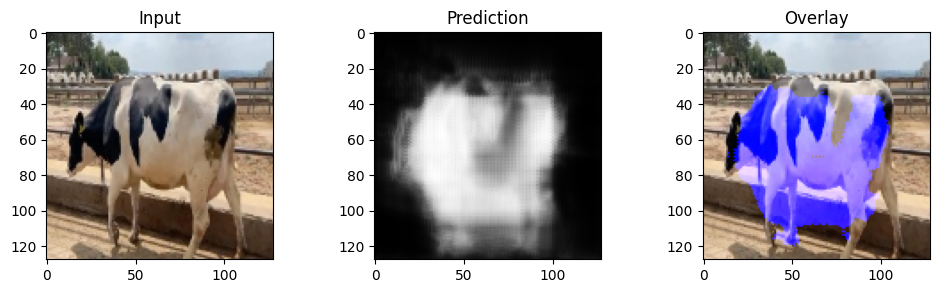

In [222]:
import cv2
import numpy as np

def predict_and_visualize_uploaded(model, image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image: {image_path}")
        return None, None

    img_resized = cv2.resize(img, (128, 128))
    inp = img_resized / 255.0
    inp = np.expand_dims(inp, axis=0)

    start_time = time.time()
    pred = model.predict(inp)[0]
    inference_time = time.time() - start_time

    mask_bin = (pred > 0.5).astype(np.uint8)

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(img_resized[..., ::-1])
    plt.title("Input")

    plt.subplot(1, 3, 2)
    plt.imshow(pred.squeeze(), cmap="gray")
    plt.title("Prediction")

    overlay = img_resized.copy()
    overlay[:, :, 0] = overlay[:, :, 0] * (1 - mask_bin.squeeze()) + 255 * mask_bin.squeeze()
    plt.subplot(1, 3, 3)
    plt.imshow(overlay[..., ::-1])
    plt.title("Overlay")

    plt.tight_layout()
    plt.show()

    return pred.squeeze(), inference_time


pred, inference_time = predict_and_visualize_uploaded(model, image_path)


In [223]:
mask_path = image_path.replace("images", "masks").replace(".jpg", ".png").replace(".jpeg", ".png")

true_mask = cv2.imread(mask_path, 0)
if true_mask is None:
    print("⚠ No ground truth mask found for this image.")
else:
    true_mask = cv2.resize(true_mask, (128, 128))
    precision, recall, f1, iou = evaluate_mask(pred, true_mask)

    print("Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"IoU:       {iou:.4f}")
    print(f"Inference Time: {inference_time:.4f} seconds")


⚠ No ground truth mask found for this image.
